# <center><span style="color:#336699">Introdução à Programação com Dados Geoespaciais em Ambientes de Computação Interativa</span></center>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 150%;">
    Aula 03: Manipulação de Dados Matriciais em Python</br>
    <span style="font-size: 0.75em;">Parte I - Manipulação de Dados Matriciais em Python</span>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gilberto Ribeiro de Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Karine Reis Ferreira<sup><a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Marcos Adami<sup><a href="https://orcid.org/0000-0003-4247-4477"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Thales Sehn Körting<sup><a href="https://orcid.org/0000-0002-0876-0501"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Divisão de Observação da Terra e Geoinformática, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Última Atualização: 09 de Fevereiro de 2026
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
    <b>Resumo.</b> Este Jupyter Notebook apresenta uma visão geral de como realizar a leitura de dados matriciais com a biblioteca <em>rasterio</em> e como realizar processamentos com a biblioteca <em>NumPy</em>.
</div>

# <span style="color:#336699">Introdução</span>
<hr style="border:1px solid #0077b9;">

Nesta seção iremos discutir como realizar a leitura de dados matriciais, presentes em imagens de sensoriamento remoto, também conhecidos como **rasters**. 


Para isso, começaremos construindo um pequeno programa que irá abrir um arquivo de dados matricial no formato **GeoTIFF** contendo uma banda de uma imagem do satélite CBERS-4A, referente a data de 05 de Fevereiro de 2026.


<center><img src="../img/dados-matriciais/catalogo-imagens-inpe.png" width="50%" /></center>


<center>Fonte: <a href="https://www.dgi.inpe.br/catalogo/explore"><b>Catálogo de imagens do INPE</b></a>.</center>

<br>
A leitura será realizada com ajuda da biblioteca <a href=https://rasterio.readthedocs.io/en/stable/>rasterio</a> que oferece facilidades para leitura e escrita de dados matriciais. Como será visto, sua API funciona nos mesmos moldes dos protocolos de Entrada e Saída (E/S) da API de arquivos da linguagem Python (Python IO).

# <span style="color:#336699">Importação da biblioteca rasterio</span>
<hr style="border:1px solid #0077b9;">

O comando abaixo importa a biblioteca *rasterio* (geralmente utilizada como *rio* nos scripts, para simplificar):

In [1]:
import rasterio as rio

Para verificar a versão da *rasterio* em uso:

In [2]:
rio.__version__

'1.4.3'

Caso a biblioteca já não esteja disponível (como por exemplo no Google Colab), a biblioteca precisa ser instalada por meio do comando:

In [3]:
!pip install rasterio

# <span style="color:#336699">Leitura de Arquivos GeoTIFF com a biblioteca rasterio</span>
<hr style="border:1px solid #0077b9;">

**Exemplo 1.** Abrindo o arquivo GeoTIFF com uma banda de uma imagem, mostrando o tipo do dado e o sistema de coordenadas de referência (CRS):

In [4]:
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset:
    print(type(dataset))
    print(dataset.crs)

<class 'rasterio.io.DatasetReader'>
EPSG:32722


----

**Exemplo 2.** Apresentar informações sobre a imagem, como os limites geográficos, a transformação afim, bem como número de linhas e  colunas e bandas:

In [5]:
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset:
    print(f'Limites da imagem: {dataset.bounds}')
    print(f'Transformação afim: \n{dataset.transform}')
    
    linhas = dataset.height
    colunas = dataset.width
    print(f'Dimensões da imagem (linhas x colunas): {linhas} x {colunas}')

Limites da imagem: BoundingBox(left=182896.0, bottom=8704704.0, right=297712.0, top=8823504.0)
Transformação afim: 
| 16.00, 0.00, 182896.00|
| 0.00,-16.00, 8823504.00|
| 0.00, 0.00, 1.00|
Dimensões da imagem (linhas x colunas): 7425 x 7176


A transformação afim do dataset inclui os parâmetros para transformação do espaço de coordenadas da imagem (linha e coluna) para coordendas georreferenciadas (coordenadas projetadas ou geográficas. Os valores a seguir contém informações sobre a imagem:

* 16.00: Resolução do pixel ao longo do eixo-x
* 0.00: Rotação ao longo das linhas. Zero para imagens alinhadas ao norte (north-up image).
* 182896.00: Coordenada-x do pixel do canto superior esquerdo da imagem.
* 0.00: Rotação ao longo das linhas. Zero para imagens alinhadas ao norte (north-up image).
* -16.00: Resolução do pixel ao longo do eixo-y
* 8823504.00: Coordenada-y do pixel do canto superior esquerdo da imagem.

----

**Exemplo 3.** Apresentar informações sobre o número de bandas e o tipo de dado contido em cada banda:

In [6]:
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset_nir:
    print(f'Número de bandas: {len(dataset_nir.indexes)}')
    print(f'Número de linhas e colunas: {dataset_nir.shape}')
    print(f'Índice das bandas para acesso {dataset_nir.indexes}')
    print(f'Tipo de dado nas bandas: {dataset_nir.dtypes}')

Número de bandas: 1
Número de linhas e colunas: (7425, 7176)
Índice das bandas para acesso (1,)
Tipo de dado nas bandas: ('uint8',)


----

**Exemplo 4:** Obter a matriz numérica da imagem, em formato NumPy, e consultar os valores de partes da imagem:

In [7]:
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset_nir:
    # no exemplo anterior vimos que a matriz só tem uma banda, de número 1
    matriz_nir = dataset_nir.read(1)
    recorte_1 = matriz_nir[0:15, 0:15]
    recorte_2 = matriz_nir[4500:4515, 4500:4515]
    print(f'Valor usado como nodata {dataset_nir.nodata}')
    print(f'Parte da matriz de pixels (as 15 primeiras linhas e colunas): \n{recorte_1}')
    print(f'Outra parte da Matriz de pixels (15 linhas e colunas no meio da matriz): \n{recorte_2}')

Valor usado como nodata 0.0
Parte da matriz de pixels (as 15 primeiras linhas e colunas): 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Outra parte da Matriz de pixels (15 linhas e colunas no meio da matriz): 
[[84 84 86 85 85 86 85 85 88 89 87 89 87 83 84]
 [80 82 80 81 84 83 85 84 86 87 87 87 87 85 86]
 [78 78 77 77 80 80 83 82 86 87 86 86 88 87 84]
 [76 75 75 73 77 82 84 85 88 88 86 86 88 85 84]
 [72 72 74 73 74 78 83 87 89 89 86 87 87 85 84]
 [71 71 71 74 73 75 80 87 88 86 88 88 86 86 84]
 [72 71 71 73 76 77 79 86 87 87 89 86 85 86 84]
 [7

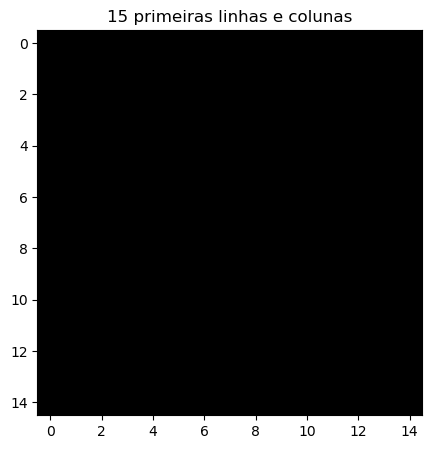

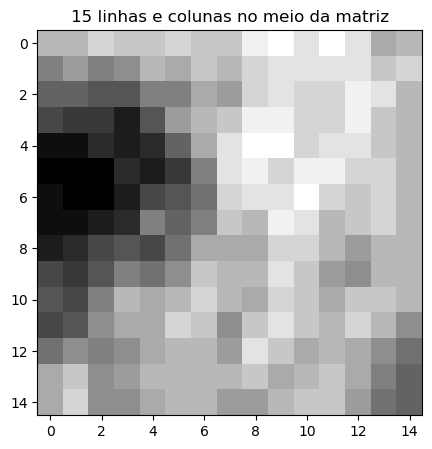

In [8]:
import matplotlib.pyplot as plt
# uma forma mais adequada de visualizar os números 
# é aplicando uma escala de cores
plt.figure(figsize=(5, 5))
plt.imshow(recorte_1, cmap='gray'), plt.title('15 primeiras linhas e colunas')
plt.figure(figsize=(5, 5))
plt.imshow(recorte_2, cmap='gray'), plt.title('15 linhas e colunas no meio da matriz');

# <span style="color:#336699">Visualizando as imagens</span>
<hr style="border:1px solid #0077b9;">

Para visualizar as imagens, podemos combinar as bibliotecas NumPy e Matplotlib. Se a imagem estiver organizada em arquivos separados, podemos gerar uma matriz NumPy para cada banda, e combiná-las posteriormente. 

*Obs.:* É preciso garantir a equivalência entre número de linhas e colunas, bem como a resolução espacial.

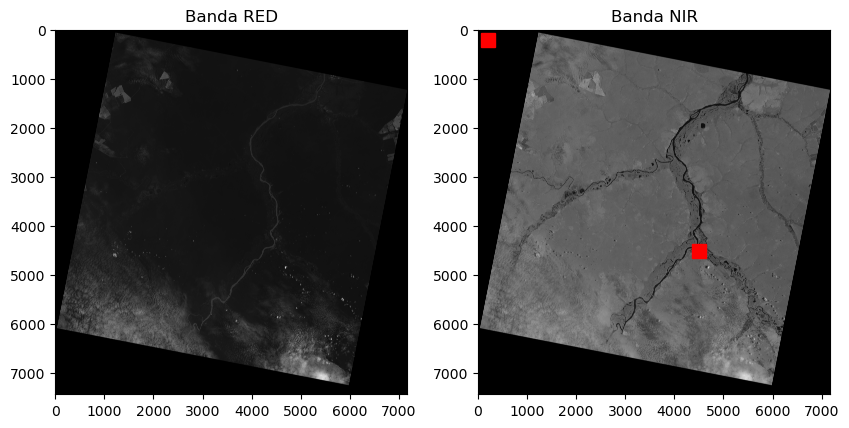

In [9]:
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND7.tif', 'r') as dataset_red, \
     rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset_nir:
    matriz_red = dataset_red.read(1)
    matriz_nir = dataset_nir.read(1)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.title("Banda RED")
    plt.imshow(matriz_red, cmap='gray')
    
    plt.subplot(122)
    plt.title("Banda NIR")
    plt.imshow(matriz_nir, cmap='gray')
    # visualização aproximada das áreas recortadas no Exemplo 4
    plt.plot(200, 200, color='red', marker='s', markersize=10)
    plt.plot(4500, 4500, color='red', marker='s', markersize=10)

    plt.show()

# <span style="color:#336699">Alterando a visualização</span>
<hr style="border:1px solid #0077b9;">

Ao alterar os números contidos nas matrizes, é possível notar o impacto visual. Cabe salientar que imagens com esse tipo de alteração já não podem ser utilizadas para estimar propriedades diretamente da resposta espectral.

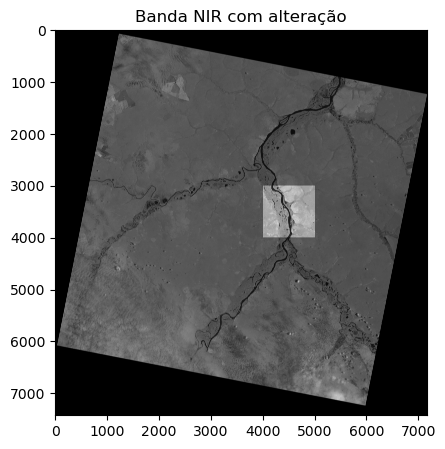

In [10]:
import matplotlib.pyplot as plt

with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset_nir:
    matriz_nir = dataset_nir.read(1)

    # alterar somente uma parte da imagem, usando 'slicing'
    # a alteração será feita mediante a multiplicação de todos os números por um escalar
    matriz_nir[3000:4000, 4000:5000] = 2 * matriz_nir[3000:4000, 4000:5000]

    plt.figure(figsize=(5, 5))
    plt.title("Banda NIR com alteração")
    plt.imshow(matriz_nir, cmap='gray')
    plt.show()

# <span style="color:#336699">Aritmética de matrizes (bandas)</span>
<hr style="border:1px solid #0077b9;">

A biblioteca NumPy dá o suporte para o cálculo de operações aritméticas entre matrizes, desde que esteja garantida a equivalência entre elas (tipos de dados, número de dimensões, etc).

Um exemplo muito utilizado em sensoriamento remoto são os índices espectrais, como o índice de vegetação por diferença normalizada, mais conhecido como *Normalized Difference Vegetation Index* (**NDVI**). Usando matrizes obtidas nas bandas do vermelho e do infra-vermelho, é possível calcular esse índice, para todos os pixels da imagem, em apenas uma linha de código.

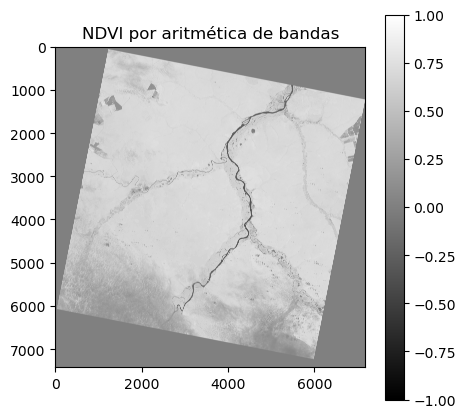

In [11]:
import matplotlib.pyplot as plt
import numpy as np
with rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND7.tif', 'r') as dataset_red, \
     rio.open('../dados/raster/CBERS_4A_MUX_20260205_214_127_L4_BAND8.tif', 'r') as dataset_nir:
    # lembre-se que o tipo de dado era uint8
    # isso significa que os dados são sem sinal (u)
    # e to tipo inteiro de 8 bits (int8, somente entre 0 e 255)
    # por isso é preciso trocar o tipo de dados para o cálculo do NDVI funcionar
    matriz_red = dataset_red.read(1).astype(np.float32)
    matriz_nir = dataset_nir.read(1).astype(np.float32)

    # estamos colocando o valor 0.00001 no denominador
    # somente para evitar possíveis divisões por zero
    ndvi = (matriz_nir - matriz_red) / (matriz_nir + matriz_red + 0.0001)

    plt.figure(figsize=(5, 5))
    plt.title("NDVI por aritmética de bandas")
    plt.imshow(ndvi, cmap='gray', vmin=-1, vmax=1)
    plt.colorbar()
    plt.show()

# <span style="color:#336699">Comentários gerais</span>
<hr style="border:1px solid #0077b9;">

- As imagens podem ser armazenadas de diferentes formas, sendo uma delas o armazenamento individual, em que há um raster independente para cada banda. Neste caso, cada arquivo possui metadados independentes. Os metadados de um arquivo incluem informações sobre o sistema de coordenadas geoespacial, limites geográficos, dimensões e o tipo de dados associado aos pixels da imagem.
- Outra maneira consiste em armazenar diversas bandas no mesmo arquivo. Neste caso, o conjunto de metadados vale para todas as bandas.
- É importante observar sempre o tipo de dados original da imagem, pois ele pode restringir certos cálculos (como índices espectrais por exemplo).

# <span style="color:#336699">Referências Bibliográficas</span>
<hr style="border:1px solid #0077b9;">

- [Catálogo de Imagens do INPE](https://www.dgi.inpe.br/catalogo/explore). Disponível online.
- [Documentação da biblioteca rasterio](https://rasterio.readthedocs.io/en/stable/). Disponível online.
- [Documentação da biblioteca Matplotlib](https://matplotlib.org/). Disponível online.
- [Documentação da biblioteca NumPy](https://numpy.org/). Disponível online.